In [1]:
%load_ext autoreload
%autoreload 2

# -*- coding: utf-8 -*-
import sys
import os
import pandas as pd
import numpy as np
import time

# Set the current directory and utilities path
current_dir = os.getcwd()
utilities_dir = os.path.join(current_dir, '../../utilities')

# Change the working directory to the notebook's directory
os.chdir(current_dir)

# Modify the module search path to include utilities directory
sys.path.insert(0, utilities_dir)

# Import the function to evaluate BEM accuracy
from bem_solution_functions import evaluate_bem_accuracy
from analytical_solution_functions import sound_hard_circle_calc 
from analytical_solution_functions import mask_displacement
from pinns_solution_functions import evaluate_pinn_accuracy 

# BEM time and accuracy

In [2]:
# Lista de valores de n a evaluar
n_values = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

# Crear listas vacías para almacenar los resultados
results = []

# Evaluar para cada n
for n in n_values:
    print(f"Evaluando para n = {n}...")
    t, err = evaluate_bem_accuracy(n=n)
    results.append({
        "n": n,
        "time_sec": t,
        "relative_error": err
    })

# Convertir a DataFrame
df = pd.DataFrame(results)

# Guardar en un archivo CSV
df.to_csv("data/bem_accuracy_vs_n.csv", index=False)

# Mostrar resultados
print("Resultados guardados en 'bem_accuracy_vs_n.csv'")

Evaluando para n = 5...
Evaluando para n = 10...
Evaluando para n = 15...
Evaluando para n = 20...
Evaluando para n = 25...
Evaluando para n = 30...
Evaluando para n = 35...
Evaluando para n = 40...
Evaluando para n = 45...
Evaluando para n = 50...
Resultados guardados en 'bem_accuracy_vs_n.csv'


# PINNs time and accuracy

In [5]:
 
# Listas de capas y neuronas por capa a evaluar
layer_values = [1, 2, 3]
neuron_values = [25, 50, 75]

# Crear lista para almacenar resultados
results = []

# Evaluar para cada combinación de capas y neuronas
for layers in layer_values:
    for neurons in neuron_values:
        print(f"Evaluando para capas = {layers}, neuronas = {neurons}...")
        t, err = evaluate_pinn_accuracy(layers, neurons)
        results.append({
            "layers": layers,
            "neurons_per_layer": neurons,
            "time_sec": t,
            "relative_error": err
        })

# Convertir a DataFrame
df = pd.DataFrame(results)

# Guardar en un archivo CSV
df.to_csv("data/pinn_accuracy_vs_architecture.csv", index=False)

# Mostrar mensaje final
print("Resultados guardados en 'pinn_accuracy_vs_architecture.csv'")

Evaluando para capas = 1, neuronas = 25...
Evaluando para capas = 1, neuronas = 50...
Evaluando para capas = 1, neuronas = 75...
Evaluando para capas = 2, neuronas = 25...
Evaluando para capas = 2, neuronas = 50...
Evaluando para capas = 2, neuronas = 75...
Evaluando para capas = 3, neuronas = 25...
Evaluando para capas = 3, neuronas = 50...
Evaluando para capas = 3, neuronas = 75...
Resultados guardados en 'pinn_accuracy_vs_architecture.csv'


In [25]:
pinn_df.keys

<bound method NDFrame.keys of    layers  neurons_per_layer  time_sec  relative_error
0       1                 25  0.163093        0.909947
1       1                 50  0.065364        0.798120
2       1                 75  0.085559        0.725999
3       2                 25  0.061924        0.410374
4       2                 50  0.082148        0.116607
5       2                 75  0.093672        0.077176
6       3                 25  0.066928        0.151893
7       3                 50  0.162581        0.075492
8       3                 75  0.109086        0.074648>

In [31]:
pinn_df["layers"]

0    1
1    1
2    1
3    2
4    2
5    2
6    3
7    3
8    3
Name: layers, dtype: int64

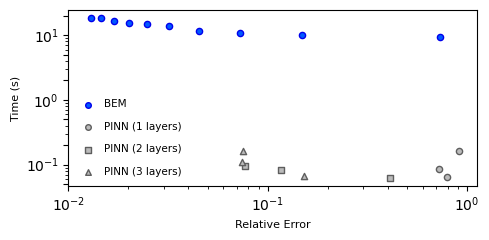

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator

# --- Load CSV data ---
bem_df = pd.read_csv("data/bem_accuracy_vs_n.csv")
pinn_df = pd.read_csv("data/pinn_accuracy_vs_architecture.csv")

# --- Extract BEM data ---
bem_rel_error = bem_df["relative_error"]
bem_time = bem_df["time_sec"]

# --- Plot setup ---
plt.figure(figsize=(5.0, 2.5))

# --- Plot BEM ---
plt.scatter(bem_rel_error, bem_time, 
            color="#0059ffff", edgecolors="#0000ecff", 
            label='BEM', s=20, zorder=5)

# --- Define marker styles for different number of layers ---
marker_styles = ['o', 's', '^', 'v', 'D', '*', 'X', 'P']
unique_layers = sorted(pinn_df["layers"].unique())
marker_map = dict(zip(unique_layers, marker_styles))

# --- Plot PINN grouped by num_layers ---
for layer in unique_layers:
    layer_df = pinn_df[pinn_df["layers"] == layer]
    plt.scatter(layer_df["relative_error"], layer_df["time_sec"],
                label=f'PINN ({layer} layers)',
                color="#bbbbbbff", edgecolors="#5e5e5eff", 
                marker=marker_map[layer], s=20, zorder=4)

# --- Axes labels ---
plt.xlabel('Relative Error', fontsize=8)
plt.ylabel('Time (s)', fontsize=8)

# --- Log-log scale ---
plt.xscale('log')
plt.yscale('log')

# --- Ticks ---
ax = plt.gca()
ax.set_xticks([1e+0, 1e-1, 1e-2])
ax.set_xticklabels([r'$10^{0}$', r'$10^{-1}$', r'$10^{-2}$'])
ax.yaxis.set_major_locator(LogLocator(base=10.0, subs=(1.0, 2.0, 5.0), numticks=10))

# --- Legend ---
plt.legend(loc='lower left', fontsize=7.5, frameon=False, handletextpad=0.5, markerscale=0.9, labelspacing=1.2)

# --- Final layout and save ---
plt.tight_layout()
plt.savefig("figures/rel_error_time.svg", dpi=150, bbox_inches='tight')
plt.show()